In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('StudentsPerformance.csv')

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Display Mean, Std, Min and Count of Numeric Columns

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
df.shape

(1000, 8)

# count the unique values in each columns

In [28]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [29]:
df['reading score'].value_counts()

72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: reading score, Length: 72, dtype: int64

# what are unique values in 'parental level of education'

In [30]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [31]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [32]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

# sum of null values in each column

In [33]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 'race/ethnicity','parental level of education' drop columns 

In [34]:
df.drop(['race/ethnicity','parental level of education'],inplace=True,axis=1)

In [18]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [35]:
df.drop(0,axis=0)

,gender,lunch,test preparation course,math score,reading score,writing score
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75
5,female,standard,none,71,83,78
...,...,...,...,...,...,...
995,female,standard,completed,88,99,95
996,male,free/reduced,none,62,55,55
997,female,free/reduced,completed,59,71,65
998,female,standard,completed,68,78,77


# show relationship of coluns

In [38]:
correlation = df.corr()

In [39]:
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [41]:
correlation.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [40]:
import seaborn as sns

<AxesSubplot:>

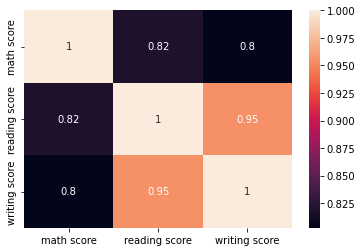

In [42]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# most repeated degree in parental level of education

In [44]:
df_p = pd.read_csv('StudentsPerformance.csv')

In [45]:
df_p['parental level of education'].value_counts()[:1]

some college    226
Name: parental level of education, dtype: int64

# number of students have '	test preparation course' = none

In [48]:
len(df[df['test preparation course']=='none'])

642

# ratio of gender in dataset

In [49]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# categorical data into dummy or indicator variables.

In [53]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [55]:
modified_df = pd.get_dummies(df)

In [56]:
modified_df # hello doen

,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,1
1,69,90,88,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,1
3,47,57,44,0,1,1,0,0,1
4,76,78,75,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,1,1,0
996,62,55,55,0,1,1,0,0,1
997,59,71,65,1,0,1,0,1,0
998,68,78,77,1,0,0,1,1,0
